## Super market sales for 3 different stores data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [205]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

## Questions to Investigate
- 1) What is the most common payment method acros different branches ?
- 2) Which store has the highest rate ?
- 3) What is the proportion of each gender across our customers in each branch ?
- 4) Which store has the highest gross income ?
- 5) When do customers go to the store?

-----------------

### 1) What is the most common payment method acros different branches ?

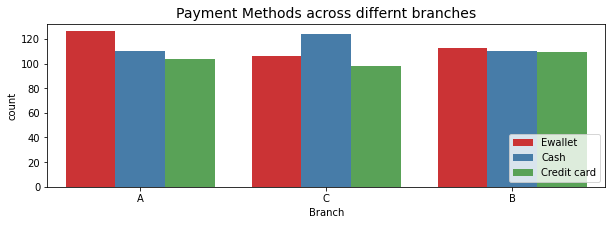

In [210]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 3)
sns.countplot(data=df,x='Branch',hue='Payment',ax=ax);
plt.legend( loc=4);
plt.title('Payment Methods across differnt branches',fontsize=14);

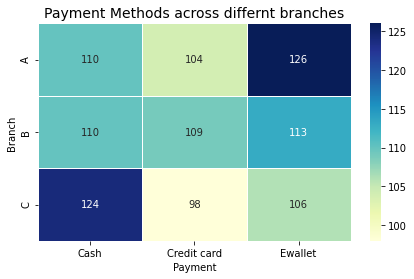

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
ct_counts=df.groupby(['Branch','Payment']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='Branch',columns='Payment',values='count')
sns.heatmap(ct_counts,annot=True,fmt='g', linewidths=.8,cmap="YlGnBu",ax=ax);
plt.title('Payment Methods across differnt branches',fontsize=14);

In [20]:
ct_counts.sum()

Payment
Cash           344
Credit card    311
Ewallet        345
dtype: int64

## Payment method insights:-
- The most common payment method in branch A is the Ewallet by 37% followed by Cash by 32.35% and finally the Credit card by 30%.
- The most common payment method in branch B is the Ewallet by 34% followed by Cash by 33% and finally the Credit card by 32.8%.
- The most common payment method in branch C is the Cash 37.8% followed by Ewallet by 32.3% and finally the Credit card by 29.8%.

**Overall, Despite that the differences between the number of people who use different payment methods, the most common payment method os the Ewallet followed by Cash, and the least used payment method is the Credit card**

-----------

### 2) Which store has the highest rate ?

In [34]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [66]:
df.groupby(by='Branch').agg({'Rating':'mean'}).sort_values(by='Rating')

,Rating
Branch,
B,6.818072
A,7.027059
C,7.072866


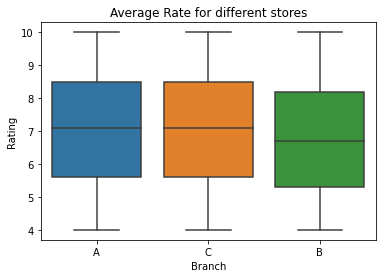

In [43]:
sns.boxplot(data=df,x='Branch',y='Rating');
plt.title('Average Rate for different stores');

In [44]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [65]:
df.groupby(by='Gender').agg({'Rating':'mean'})

,Rating
Gender,
Female,6.964471
Male,6.980962


In [58]:
df.groupby(by=['Branch','Gender']).agg({'Rating':'mean'})

Rating
Branch Gender          
A      Female  6.839130
       Male    7.196089
B      Female  6.876543
       Male    6.762353
C      Female  7.157865
       Male    6.972000

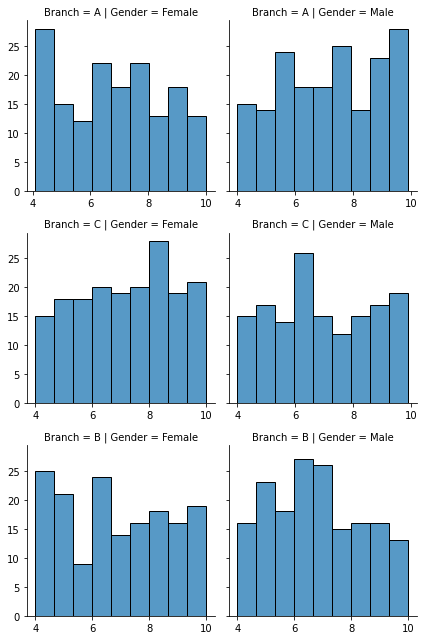

In [56]:
g = sns.FacetGrid(df, col="Gender",  row="Branch",sharex=False)
g.map_dataframe(sns.histplot, x="Rating");

## Rating Insights
- Women tend to like store C more than store A and B.
- Despite the slight differences on the average rate across different stores, store B has the lowest average rate, and store A and B have almost the same rate.

----------

## 3) What is the proportion of each gender across our customers in each branch ?

In [67]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [68]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

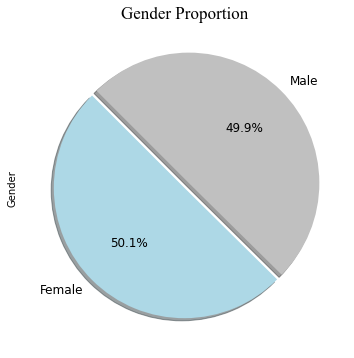

In [75]:
plt.figure(figsize=[8,6])
my_colors = ['lightblue','silver']
my_explode = (0, 0.05)
df['Gender'].value_counts(normalize=True).plot(kind='pie',fontsize=12,autopct='%1.1f%%', startangle=135, shadow = True
                                                           ,colors=my_colors,explode=my_explode);
plt.title('Gender Proportion',fontname='Times new roman',fontsize=17);

In [76]:
df.groupby(by=['Branch','Gender']).agg({'Gender':'count'})

Gender
Branch Gender        
A      Female     161
       Male       179
B      Female     162
       Male       170
C      Female     178
       Male       150

## Gender Propotion insights
- Overall there is no significant difference between each gender proportion across all the stores.
- On store level, 54.2% of the customers in store C are females, 52.6% of the customers in store A are males, and there is no big difference in gender proportion in store B.


-------

## 4) Which store has the highest gross income ?

In [78]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


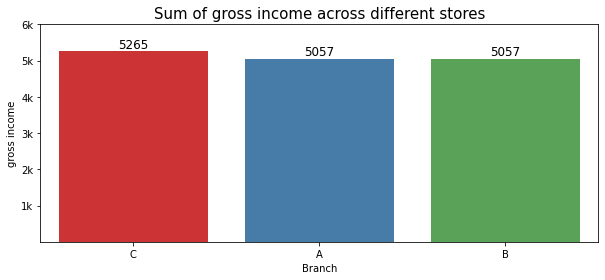

In [211]:
# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
base_color=sns.color_palette()[0]
order=df.groupby(by='Branch').agg({'gross income':'sum'}).sort_values(by='gross income',ascending=False).index
sns.barplot(data=df,x='Branch',y='gross income',order=order,estimator=sum,ci=False,ax=ax)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set

ax.set_ylim([0, 6000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

#plt.xticks(rotation=90)    
plt.title('Sum of gross income across different stores',fontsize=15)
plt.yticks([1000,2000,3000,4000,5000,6000],['1k','2k','3k','4k','5k','6k']);

plt.show()

In [102]:
df.groupby('Product line').agg({'gross income':'sum'}).sort_values(by='gross income')

,gross income
Product line,
Health and beauty,2342.5590
Home and lifestyle,2564.8530
Fashion accessories,2585.9950
Electronic accessories,2587.5015
Sports and travel,2624.8965
Food and beverages,2673.5640


## Gross profit insights
- Despite that the difference in total gross profit across stores is small, Store C has the highest total gross profit.
- The Product that has the highest total gross income is the Food and beverages followed by 'Sports and Travel'.

--------

## 5) When do customers go to the store?

In [155]:
df_hr=df['hour'].value_counts().reset_index()

In [157]:
df_hr.rename(columns={'index': 'hour', 'hour': 'frequency'}, inplace=True)

In [160]:
df_hr=df_hr.sort_values(by='hour')

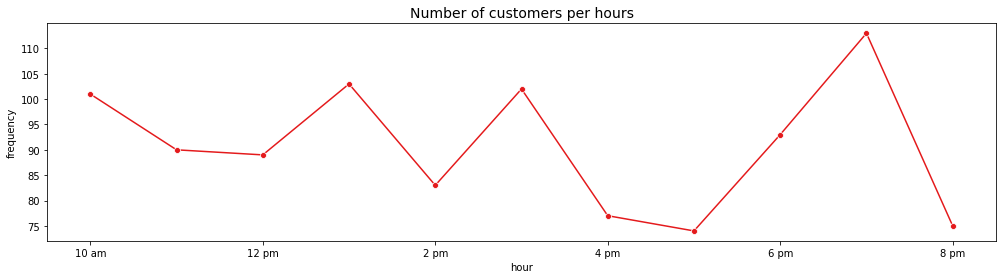

In [209]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 4)
sns.lineplot(data=df_hr,x='hour',y='frequency',marker='o',ax=ax);
plt.xticks([10,12,14,16,18,20],['10 am','12 pm','2 pm','4 pm','6 pm','8 pm']);
plt.title('Number of customers per hours',fontsize=14);

In [171]:
df['Date']= pd.to_datetime(df['Date'])

In [181]:
df['Day']=df.Date.dt.day_name()

In [187]:
order=df['Day'].value_counts().index

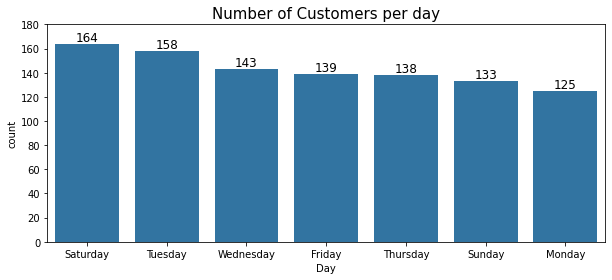

In [190]:
# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
base_color=sns.color_palette()[0]
order=df['Day'].value_counts().index
sns.countplot(data=df,x='Day',order=order,color=base_color)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set

ax.set_ylim([0, 180])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

#plt.xticks(rotation=90)    
plt.title('Number of Customers per day',fontsize=15)

plt.show()

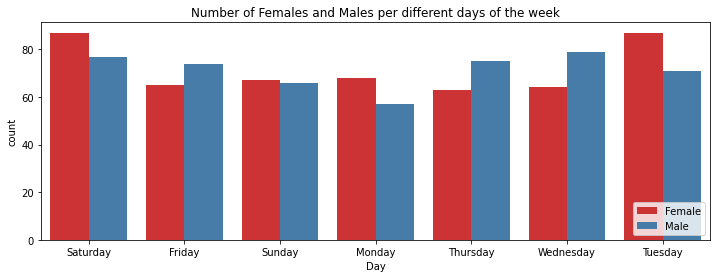

In [204]:
fig, ax = plt.subplots()
sns.set_palette("Set1")
fig.set_size_inches(12, 4)
sns.countplot(data=df,x='Day',hue='Gender',ax=ax)
plt.legend( loc=4);
plt.title('Number of Females and Males per different days of the week');

## Customers Frequency Insights
- The peak hour is 7 pm
- Saturday has the highest number of customers
- Number of Female customers are higher at: Saturday,Sunday,Monday,and Tuesday

------